# Exclusion of ABCD subjects lost to MINC and MAGeT QC

In [2]:
import pandas as pd
import numpy as np
import glob
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp

In [3]:
filePath = "/Volumes/Gruenlab-726014-YSM/hailey_dsilva/projects/AWS_cerebellum/"

Import QC data

In [4]:
fileList = glob.glob(filePath + 'FullStudy/QC/W1_Eur_*_Grp*/W1_Eur_*_Grp*.csv')
qc = pd.DataFrame()
for file in fileList:
    newFile = pd.read_csv(file)
    frames = [qc, newFile]
    qc = pd.concat(frames)

Data cleaning

In [5]:
qc.Subj.isna().sum()

6

In [6]:
qc = qc[qc['Subj'].notna()]

In [7]:
qc

,Subj,minc_bpipe_QC,minc_bpipe_notes,MAGeT_QC,MAGeT_QC_notes,HD_decision
0,NDAR_INV00BD7VDC,No,NaN,NaN,NaN,NaN
1,NDAR_INV01RGTWD2,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV021N0FLH,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV07BR8GMY,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV08WDFUCE,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
131,NDAR_INVYU20X3EV,NaN,NaN,NaN,NaN,NaN
132,NDAR_INVZ730VLUZ,No,Multiple pieces missing,NaN,NaN,NaN
133,NDAR_INVZF3VJWAN,Maybe,Moderate piece missing,NaN,NaN,NaN
134,NDAR_INVZL6CFV5G,NaN,NaN,NaN,NaN,NaN


## Numbers lost to QC

In [8]:
qc.groupby("minc_bpipe_QC", dropna=False).size()

minc_bpipe_QC
Maybe     866
No        730
NaN      1052
dtype: int64

In [9]:
qc['minc_bpipe_QC'].value_counts(normalize=True, dropna=False) * 100

NaN      39.728097
Maybe    32.703927
No       27.567976
Name: minc_bpipe_QC, dtype: float64

How many subjects are being excluded due to QC?

In [8]:
#Detailed exclusion
conditions = [
    (qc['minc_bpipe_QC'] == 'No'),
    (qc['minc_bpipe_QC'] == 'Maybe'),
    (qc['MAGeT_QC'] == 'No'),
    (qc['MAGeT_QC'] == 'Maybe') & (qc['HD_decision'] == 'Yes'),
    (qc['MAGeT_QC'] == 'Maybe') & (qc['HD_decision'] == 'No'),
    (qc['minc_bpipe_QC'].isna()) & (qc['MAGeT_QC'].isna())
    ]

values = ['MINC', 'Maybe', 'MAGeT', 'Good', 'MAGeT', 'Good']

qc['Excl'] = np.select(conditions, values)

In [11]:
qc.groupby("Excl").size()

Excl
0          7
Good     979
MAGeT     66
MINC     730
Maybe    866
dtype: int64

In [13]:
qc['Excl'].value_counts(normalize=True) * 100

Good     36.971299
Maybe    32.703927
MINC     27.567976
MAGeT     2.492447
0         0.264350
Name: Excl, dtype: float64

How many additional once they're completely QC'ed?

In [14]:
finished = 345 + 317 + 323 + 592

In [15]:
66 / finished

0.04185161699429296

In [16]:
2648 * .04

105.92

## Are there differences between usable and excluded group?

In [9]:
#Simple exclusion, Maybe's not included
conditions = [
    (qc['Excl'] == 'MINC'),
    (qc['Excl'] == 'Maybe'),
    (qc['Excl'] == 'MAGeT'),
    (qc['Excl'] == 'Good'),
    ]

values = ['Yes', 'Yes', 'Yes', 'No']

qc['Excl_s'] = np.select(conditions, values)

In [10]:
#Simple exclusion, Maybe's included
conditions = [
    (qc['Excl'] == 'MINC'),
    (qc['Excl'] == 'Maybe'),
    (qc['Excl'] == 'MAGeT'),
    (qc['Excl'] == 'Good'),
    ]

values = ['Yes', 'No', 'Yes', 'No']

qc['Excl_sM'] = np.select(conditions, values)

In [19]:
qc

,Subj,minc_bpipe_QC,minc_bpipe_notes,MAGeT_QC,MAGeT_QC_notes,HD_decision,Excl,Excl_s,Excl_sM
0,NDAR_INV00BD7VDC,No,NaN,NaN,NaN,NaN,MINC,Yes,Yes
1,NDAR_INV01RGTWD2,NaN,NaN,NaN,NaN,NaN,Good,No,No
2,NDAR_INV021N0FLH,NaN,NaN,NaN,NaN,NaN,Good,No,No
3,NDAR_INV07BR8GMY,NaN,NaN,NaN,NaN,NaN,Good,No,No
4,NDAR_INV08WDFUCE,NaN,NaN,NaN,NaN,NaN,Good,No,No
...,...,...,...,...,...,...,...,...,...
131,NDAR_INVYU20X3EV,NaN,NaN,NaN,NaN,NaN,Good,No,No
132,NDAR_INVZ730VLUZ,No,Multiple pieces missing,NaN,NaN,NaN,MINC,Yes,Yes
133,NDAR_INVZF3VJWAN,Maybe,Moderate piece missing,NaN,NaN,NaN,Maybe,Yes,No
134,NDAR_INVZL6CFV5G,NaN,NaN,NaN,NaN,NaN,Good,No,No


In [16]:
# Loading and merging phenotypic data
phenoPath = filePath + 'Pilot/data_pulls/'

Demographics = pd.read_csv(phenoPath + 'Demographics.csv')
NIHtb = pd.read_csv(phenoPath + 'NIHtb.csv')
Pearson = pd.read_csv(phenoPath + 'Pearson_scores.csv')
MRI_info = pd.read_csv(phenoPath + 'MRI_info.csv')

pheno = pd.merge(Demographics,NIHtb,on='SUBJECTKEY',how='outer')
pheno = pd.merge(pheno,Pearson,on='SUBJECTKEY',how='outer')
pheno = pd.merge(pheno,MRI_info,on='SUBJECTKEY',how='outer')

In [17]:
#Merging all data
data = pd.merge(qc,pheno,left_on='Subj',right_on='SUBJECTKEY',how='inner')

### Sex

#### Maybe's not included

In [22]:
ct = pd.crosstab(data.SEX, data.Excl_s)
pd.crosstab(data.SEX, data.Excl_s)

Excl_s,0,No,Yes
SEX,,,
F,4,409,838
M,3,570,824


In [23]:
#Normalized
ctn = pd.crosstab(data.SEX, data.Excl_s, normalize='index')
ctn['Diff'] = ctn['Yes'] - ctn['No']
ctn

Excl_s,0,No,Yes,Diff
SEX,,,,
F,0.003197,0.326938,0.669864,0.342926
M,0.002147,0.408017,0.589835,0.181818


In [24]:
stat, p, dof, expected = chi2_contingency(ct)
print("Stat:" + str(stat), "P:" + str(p), "DOF:" + str(dof), "Expected:" + str(expected),)

Stat:18.74493988372753 P:8.503310201074119e-05 DOF:2 Expected:[[  3.30702417 462.51095166 785.18202417]
 [  3.69297583 516.48904834 876.81797583]]


#### Maybe's included

In [25]:
ct = pd.crosstab(data.SEX, data.Excl_sM)
pd.crosstab(data.SEX, data.Excl_sM)

Excl_sM,0,No,Yes
SEX,,,
F,4,808,439
M,3,1037,357


In [26]:
#Normalized
ctn = pd.crosstab(data.SEX, data.Excl_sM, normalize='index')
ctn['Diff'] = ctn['Yes'] - ctn['No']
ctn

Excl_sM,0,No,Yes,Diff
SEX,,,,
F,0.003197,0.645883,0.350919,-0.294964
M,0.002147,0.742305,0.255548,-0.486757


In [27]:
stat, p, dof, expected = chi2_contingency(ct)
print("Stat:" + str(stat), "P:" + str(p), "DOF:" + str(dof), "Expected:" + str(expected),)

Stat:29.05186751187344 P:4.914361786531084e-07 DOF:2 Expected:[[  3.30702417 871.63708459 376.05589124]
 [  3.69297583 973.36291541 419.94410876]]


### SES

#### Maybe's not included

In [28]:
ct = pd.crosstab(data.DEMO_COMB_INCOME_V2, data.Excl_s)
pd.crosstab(data.DEMO_COMB_INCOME_V2, data.Excl_s)

Excl_s,0,No,Yes
DEMO_COMB_INCOME_V2,,,
1.0,0,6,13
2.0,0,10,13
3.0,0,7,8
4.0,1,14,26
5.0,0,31,40
6.0,0,55,89
7.0,1,141,239
8.0,2,174,290
9.0,3,403,685


In [29]:
#Normalized
ctn = pd.crosstab(data.DEMO_COMB_INCOME_V2, data.Excl_s, normalize='index')
ctn['Diff'] = ctn['Yes'] - ctn['No']
ctn

Excl_s,0,No,Yes,Diff
DEMO_COMB_INCOME_V2,,,,
1.0,0.000000,0.315789,0.684211,0.368421
2.0,0.000000,0.434783,0.565217,0.130435
3.0,0.000000,0.466667,0.533333,0.066667
4.0,0.024390,0.341463,0.634146,0.292683
5.0,0.000000,0.436620,0.563380,0.126761
6.0,0.000000,0.381944,0.618056,0.236111
7.0,0.002625,0.370079,0.627297,0.257218
8.0,0.004292,0.373391,0.622318,0.248927
9.0,0.002750,0.369386,0.627864,0.258478


In [30]:
stat, p, dof, expected = chi2_contingency(ct)
print("Stat:" + str(stat), "P:" + str(p), "DOF:" + str(dof), "Expected:" + str(expected),)

Stat:13.281855761138752 P:0.7745640296556872 DOF:18 Expected:[[5.02265861e-02 7.02454683e+00 1.19252266e+01]
 [6.08006042e-02 8.50339879e+00 1.44358006e+01]
 [3.96525680e-02 5.54569486e+00 9.41465257e+00]
 [1.08383686e-01 1.51582326e+01 2.57333837e+01]
 [1.87688822e-01 2.62496224e+01 4.45626888e+01]
 [3.80664653e-01 5.32386707e+01 9.03806647e+01]
 [1.00717523e+00 1.40860650e+02 2.39132175e+02]
 [1.23187311e+00 1.72286254e+02 2.92481873e+02]
 [2.88406344e+00 4.03356873e+02 6.84759063e+02]
 [1.04947130e+00 1.46776057e+02 2.49174471e+02]]


#### Maybe's included

In [31]:
ct = pd.crosstab(data.DEMO_COMB_INCOME_V2, data.Excl_sM)
pd.crosstab(data.DEMO_COMB_INCOME_V2, data.Excl_sM)

Excl_sM,0,No,Yes
DEMO_COMB_INCOME_V2,,,
1.0,0,12,7
2.0,0,18,5
3.0,0,11,4
4.0,1,29,11
5.0,0,52,19
6.0,0,98,46
7.0,1,261,119
8.0,2,332,132
9.0,3,759,329


In [32]:
#Normalized
ctn = pd.crosstab(data.DEMO_COMB_INCOME_V2, data.Excl_sM, normalize='index')
ctn['Diff'] = ctn['Yes'] - ctn['No']
ctn

Excl_sM,0,No,Yes,Diff
DEMO_COMB_INCOME_V2,,,,
1.0,0.000000,0.631579,0.368421,-0.263158
2.0,0.000000,0.782609,0.217391,-0.565217
3.0,0.000000,0.733333,0.266667,-0.466667
4.0,0.024390,0.707317,0.268293,-0.439024
5.0,0.000000,0.732394,0.267606,-0.464789
6.0,0.000000,0.680556,0.319444,-0.361111
7.0,0.002625,0.685039,0.312336,-0.372703
8.0,0.004292,0.712446,0.283262,-0.429185
9.0,0.002750,0.695692,0.301558,-0.394134


In [33]:
stat, p, dof, expected = chi2_contingency(ct)
print("Stat:" + str(stat), "P:" + str(p), "DOF:" + str(dof), "Expected:" + str(expected),)

Stat:12.727439567256575 P:0.8075038713045131 DOF:18 Expected:[[5.02265861e-02 1.32382931e+01 5.71148036e+00]
 [6.08006042e-02 1.60253021e+01 6.91389728e+00]
 [3.96525680e-02 1.04512840e+01 4.50906344e+00]
 [1.08383686e-01 2.85668429e+01 1.23247734e+01]
 [1.87688822e-01 4.94694109e+01 2.13429003e+01]
 [3.80664653e-01 1.00332326e+02 4.32870091e+01]
 [1.00717523e+00 2.65462613e+02 1.14530211e+02]
 [1.23187311e+00 3.24686556e+02 1.40081571e+02]
 [2.88406344e+00 7.60156722e+02 3.27959215e+02]
 [1.04947130e+00 2.76610650e+02 1.19339879e+02]]


### Age

In [34]:
data['Age'] = data['INTERVIEW_AGE'] / 12

#### Maybe's not included

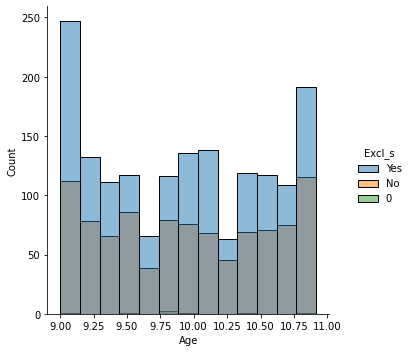

In [35]:
sns.displot(data, x="Age", hue="Excl_s")

In [36]:
summary, results = rp.ttest(group1= data['Age'][data['Excl_s'] == 'Yes'], group1_name= "Excluded",
                            group2= data['Age'][data['Excl_s'] == 'No'], group2_name= "Usable")
print(summary)
print(results)

   Variable       N      Mean        SD        SE  95% Conf.  Interval
0  Excluded  1662.0  9.921179  0.624451  0.015317   9.891136  9.951223
1    Usable   979.0  9.954716  0.613224  0.019599   9.916255  9.993176
2  combined  2641.0  9.933611  0.620408  0.012072   9.909939  9.957283
                  Independent t-test    results
0  Difference (Excluded - Usable) =     -0.0335
1              Degrees of freedom =   2639.0000
2                               t =     -1.3419
3           Two side test p value =      0.1797
4          Difference < 0 p value =      0.0899
5          Difference > 0 p value =      0.9101
6                       Cohen's d =     -0.0541
7                       Hedge's g =     -0.0540
8                   Glass's delta =     -0.0537
9                     Pearson's r =      0.0261


#### Maybe's included

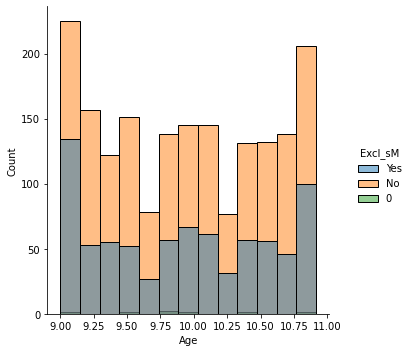

In [37]:
sns.displot(data, x="Age", hue="Excl_sM")

In [38]:
summary, results = rp.ttest(group1= data['Age'][data['Excl_sM'] == 'Yes'], group1_name= "Excluded",
                            group2= data['Age'][data['Excl_sM'] == 'No'], group2_name= "Usable")
print(summary)
print(results)

   Variable       N      Mean        SD        SE  95% Conf.  Interval
0  Excluded   796.0  9.916039  0.636338  0.022554   9.871765  9.960312
1    Usable  1845.0  9.941192  0.613427  0.014281   9.913183  9.969201
2  combined  2641.0  9.933611  0.620408  0.012072   9.909939  9.957283
                  Independent t-test    results
0  Difference (Excluded - Usable) =     -0.0252
1              Degrees of freedom =   2639.0000
2                               t =     -0.9561
3           Two side test p value =      0.3391
4          Difference < 0 p value =      0.1696
5          Difference > 0 p value =      0.8304
6                       Cohen's d =     -0.0405
7                       Hedge's g =     -0.0405
8                   Glass's delta =     -0.0395
9                     Pearson's r =      0.0186


### Reading score

#### Maybe's not included

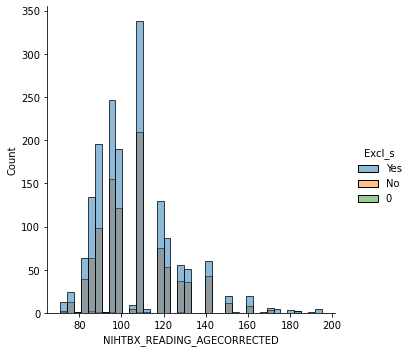

In [39]:
sns.displot(data, x="NIHTBX_READING_AGECORRECTED", hue="Excl_s")

In [40]:
summary, results = rp.ttest(group1= data['NIHTBX_READING_AGECORRECTED'][data['Excl_s'] == 'Yes'], group1_name= "Excluded",
                            group2= data['NIHTBX_READING_AGECORRECTED'][data['Excl_s'] == 'No'], group2_name= "Usable")
print(summary)
print(results)

   Variable       N        Mean         SD        SE   95% Conf.    Interval
0  Excluded  1662.0  105.507220  18.925396  0.464226  104.596690  106.417750
1    Usable   979.0  105.958121  17.469497  0.558328  104.862463  107.053778
2  combined  2641.0  105.674366  18.397093  0.357985  104.972406  106.376326
                  Independent t-test    results
0  Difference (Excluded - Usable) =     -0.4509
1              Degrees of freedom =   2639.0000
2                               t =     -0.6083
3           Two side test p value =      0.5431
4          Difference < 0 p value =      0.2715
5          Difference > 0 p value =      0.7285
6                       Cohen's d =     -0.0245
7                       Hedge's g =     -0.0245
8                   Glass's delta =     -0.0238
9                     Pearson's r =      0.0118


#### Maybe's included

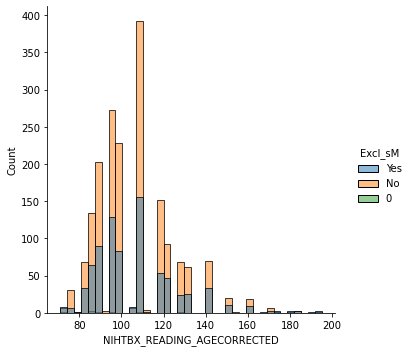

In [41]:
sns.displot(data, x="NIHTBX_READING_AGECORRECTED", hue="Excl_sM")

In [42]:
summary, results = rp.ttest(group1= data['NIHTBX_READING_AGECORRECTED'][data['Excl_sM'] == 'Yes'], group1_name= "Excluded",
                            group2= data['NIHTBX_READING_AGECORRECTED'][data['Excl_sM'] == 'No'], group2_name= "Usable")
print(summary)
print(results)

   Variable       N        Mean         SD        SE   95% Conf.    Interval
0  Excluded   796.0  106.074121  19.916070  0.705906  104.688460  107.459781
1    Usable  1845.0  105.501897  17.704449  0.412177  104.693513  106.310281
2  combined  2641.0  105.674366  18.397093  0.357985  104.972406  106.376326
                  Independent t-test    results
0  Difference (Excluded - Usable) =      0.5722
1              Degrees of freedom =   2639.0000
2                               t =      0.7334
3           Two side test p value =      0.4634
4          Difference < 0 p value =      0.7683
5          Difference > 0 p value =      0.2317
6                       Cohen's d =      0.0311
7                       Hedge's g =      0.0311
8                   Glass's delta =      0.0287
9                     Pearson's r =      0.0143


### Reading score

#### Maybe's not included

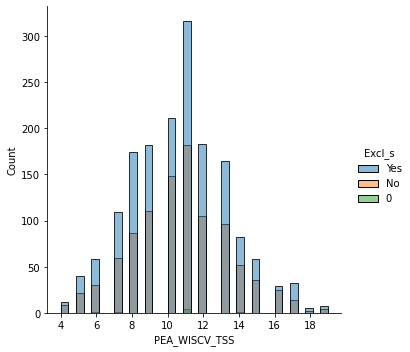

In [43]:
sns.displot(data, x="PEA_WISCV_TSS", hue="Excl_s")

In [44]:
summary, results = rp.ttest(group1= data['PEA_WISCV_TSS'][data['Excl_s'] == 'Yes'], group1_name= "Excluded",
                            group2= data['PEA_WISCV_TSS'][data['Excl_s'] == 'No'], group2_name= "Usable")
print(summary)
print(results)

   Variable       N       Mean        SD        SE  95% Conf.   Interval
0  Excluded  1662.0  10.560770  2.741234  0.067240  10.428885  10.692655
1    Usable   979.0  10.643514  2.702832  0.086383  10.473997  10.813031
2  combined  2641.0  10.591443  2.726842  0.053061  10.487397  10.695488
                  Independent t-test    results
0  Difference (Excluded - Usable) =     -0.0827
1              Degrees of freedom =   2639.0000
2                               t =     -0.7531
3           Two side test p value =      0.4514
4          Difference < 0 p value =      0.2257
5          Difference > 0 p value =      0.7743
6                       Cohen's d =     -0.0303
7                       Hedge's g =     -0.0303
8                   Glass's delta =     -0.0302
9                     Pearson's r =      0.0147


#### Maybe's included

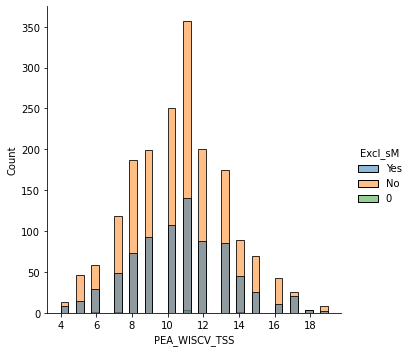

In [45]:
sns.displot(data, x="PEA_WISCV_TSS", hue="Excl_sM")

In [46]:
summary, results = rp.ttest(group1= data['PEA_WISCV_TSS'][data['Excl_sM'] == 'Yes'], group1_name= "Excluded",
                            group2= data['PEA_WISCV_TSS'][data['Excl_sM'] == 'No'], group2_name= "Usable")
print(summary)
print(results)

   Variable       N       Mean        SD        SE  95% Conf.   Interval
0  Excluded   796.0  10.636935  2.749974  0.097470  10.445605  10.828264
1    Usable  1845.0  10.571816  2.717316  0.063262  10.447743  10.695888
2  combined  2641.0  10.591443  2.726842  0.053061  10.487397  10.695488
                  Independent t-test    results
0  Difference (Excluded - Usable) =      0.0651
1              Degrees of freedom =   2639.0000
2                               t =      0.5631
3           Two side test p value =      0.5734
4          Difference < 0 p value =      0.7133
5          Difference > 0 p value =      0.2867
6                       Cohen's d =      0.0239
7                       Hedge's g =      0.0239
8                   Glass's delta =      0.0237
9                     Pearson's r =      0.0110


## Why are more females being excluded? 

### MRI manufacturer differences

In [23]:
ct = pd.crosstab(data.MRI_INFO_MANUFACTURERSMN, data.Excl_sM)
pd.crosstab(data.MRI_INFO_MANUFACTURERSMN, data.Excl_sM)

Excl_sM,0,No,Yes
MRI_INFO_MANUFACTURERSMN,,,
Achieva dStream,0,247,147
Ingenia,0,78,58
Prisma,7,829,298
Prisma_fit,0,691,293


In [24]:
#Normalized
ctn = pd.crosstab(data.MRI_INFO_MANUFACTURERSMN, data.Excl_sM, normalize='index')
ctn['Diff'] = ctn['Yes'] - ctn['No']
ctn

Excl_sM,0,No,Yes,Diff
MRI_INFO_MANUFACTURERSMN,,,,
Achieva dStream,0.000000,0.626904,0.373096,-0.253807
Ingenia,0.000000,0.573529,0.426471,-0.147059
Prisma,0.006173,0.731041,0.262787,-0.468254
Prisma_fit,0.000000,0.702236,0.297764,-0.404472


In [25]:
stat, p, dof, expected = chi2_contingency(ct)
print("Stat:" + str(stat), "P:" + str(p), "DOF:" + str(dof), "Expected:" + str(expected),)

Stat:36.50115698262164 P:2.2024313590350026e-06 DOF:6 Expected:[[1.04154079e+00 2.74520393e+02 1.18438066e+02]
 [3.59516616e-01 9.47583082e+01 4.08821752e+01]
 [2.99773414e+00 7.90117069e+02 3.40885196e+02]
 [2.60120846e+00 6.85604230e+02 2.95794562e+02]]


### MRI manufacturer differences

In [28]:
pd.crosstab(data.MRI_INFO_MANUFACTURERSMN, data.SEX)

SEX,F,M
MRI_INFO_MANUFACTURERSMN,,
Achieva dStream,202,192
Ingenia,74,62
Prisma,502,632
Prisma_fit,473,511


In [31]:
pd.crosstab([data.MRI_INFO_MANUFACTURERSMN, data.SEX], data.Excl_sM)

Excl_sM                       0   No  Yes
MRI_INFO_MANUFACTURERSMN SEX             
Achieva dStream          F    0  123   79
                         M    0  124   68
Ingenia                  F    0   40   34
                         M    0   38   24
Prisma                   F    4  334  164
                         M    3  495  134
Prisma_fit               F    0  311  162
                         M    0  380  131

In [32]:
pd.crosstab([data.MRI_INFO_MANUFACTURERSMN, data.SEX], data.Excl_sM, normalize='index')

Excl_sM                              0        No       Yes
MRI_INFO_MANUFACTURERSMN SEX                              
Achieva dStream          F    0.000000  0.608911  0.391089
                         M    0.000000  0.645833  0.354167
Ingenia                  F    0.000000  0.540541  0.459459
                         M    0.000000  0.612903  0.387097
Prisma                   F    0.007968  0.665339  0.326693
                         M    0.004747  0.783228  0.212025
Prisma_fit               F    0.000000  0.657505  0.342495
                         M    0.000000  0.743640  0.256360

In [35]:
pd.crosstab([data.MRI_INFO_MANUFACTURERSMN, data.SEX], data.Excl)

Excl                          0  Good  MAGeT  MINC  Maybe
MRI_INFO_MANUFACTURERSMN SEX                             
Achieva dStream          F    0    58      0    79     65
                         M    0    58      0    68     66
Ingenia                  F    0    14      0    34     26
                         M    0    19      0    24     19
Prisma                   F    4   173     12   152    161
                         M    3   258     13   121    237
Prisma_fit               F    0   164     16   146    147
                         M    0   235     25   106    145

In [43]:
pd.crosstab([data.MRI_INFO_MANUFACTURERSMN, data.SEX], data.Excl, normalize='index')

Excl                                 0      Good     MAGeT      MINC     Maybe
MRI_INFO_MANUFACTURERSMN SEX                                                  
Achieva dStream          F    0.000000  0.287129  0.000000  0.391089  0.321782
                         M    0.000000  0.302083  0.000000  0.354167  0.343750
Ingenia                  F    0.000000  0.189189  0.000000  0.459459  0.351351
                         M    0.000000  0.306452  0.000000  0.387097  0.306452
Prisma                   F    0.007968  0.344622  0.023904  0.302789  0.320717
                         M    0.004747  0.408228  0.020570  0.191456  0.375000
Prisma_fit               F    0.000000  0.346723  0.033827  0.308668  0.310782
                         M    0.000000  0.459883  0.048924  0.207436  0.283757